In [1]:
import numpy as np

Data loading

In [3]:
x_train=np.load("x_train.npy")
y_train=np.load("y_train.npy")

In [11]:
x_val=np.load("x_val.npy")
y_val=np.load("y_val.npy")

In [9]:
y_train=y_train.astype("float32")

In [5]:
np.shape(x_train)

(4918, 224, 224, 3)

Model training

In [70]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from keras.regularizers import l2
from keras.optimizers import SGD,Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler

def scheduler(epoch, lr):
    if epoch > 2:
        return lr * 0.01 
    return lr

model = Sequential()
model.add(Input(shape=(224, 224, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96, kernel_regularizer=l2(0.01), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Optimizer
#opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop_loss = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
early_stop_accuracy = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)
lr_schedule = LearningRateScheduler(scheduler)

In [153]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, GlobalAveragePooling2D, LeakyReLU
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler

def scheduler(epoch, lr):
    if epoch > 2:
        return lr * 0.5
    return lr

model = Sequential()

model.add(Input(shape=(224, 224, 3)))

model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(GlobalAveragePooling2D())

model.add(Dense(96, kernel_regularizer=l2(0.01))) 
model.add(LeakyReLU(alpha=0.1)) 
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),SS
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop_loss = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  # Increase patience slightly
lr_schedule = LearningRateScheduler(scheduler)

callbacks = [early_stop_loss, lr_schedule]

C:\Users\kumar\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [155]:
model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stop_loss,early_stop_accuracy, lr_schedule],
    verbose=1
)

Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 87s 457ms/step - accuracy: 0.6456 - loss: 1.6079 - val_accuracy: 0.1870 - val_loss: 1.9569 - learning_rate: 5.0000e-04
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 55s 357ms/step - accuracy: 0.9091 - loss: 0.8264 - val_accuracy: 0.4350 - val_loss: 1.6931 - learning_rate: 5.0000e-04
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 55s 359ms/step - accuracy: 0.9395 - loss: 0.5404 - val_accuracy: 0.4898 - val_loss: 1.1874 - learning_rate: 5.0000e-04
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 54s 353ms/step - accuracy: 0.9605 - loss: 0.3916 - val_accuracy: 0.7967 - val_loss: 0.6970 - learning_rate: 2.5000e-04
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 54s 353ms/step - accuracy: 0.9728 - loss: 0.3258 - val_accuracy: 0.9837 - val_loss: 0.2917 - learning_rate: 1.2500e-04
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 55s 354ms/step - accuracy: 0.9746 - loss: 0.3089 - val_accuracy: 0.9939 - val_loss: 0.2480 - learning_rate: 6.2500e-05
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 54s 35

model evaluation

In [183]:
model.evaluate(x_train,y_train)

154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.9994 - loss: 0.2112


[0.23075918853282928, 0.9993900060653687]

In [37]:
x_test=np.load("x_test.npy")
y_test=np.load("y_test.npy")

In [159]:
y_pred_prob = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


In [78]:
y_pred_prob

array([[1.7293545e-12, 3.8081489e-11, 9.5366887e-22, 1.0000000e+00],
       [1.0634180e-13, 1.3356461e-12, 2.3222416e-23, 1.0000000e+00],
       [1.8705049e-13, 7.5137863e-10, 2.6243863e-16, 1.0000000e+00],
       ...,
       [4.3781131e-11, 2.5742361e-07, 2.2962190e-16, 9.9999976e-01],
       [8.1156895e-16, 2.8926662e-17, 1.0000000e+00, 1.8961272e-13],
       [2.4345474e-19, 4.2211604e-21, 1.0000000e+00, 1.2599295e-16]],
      dtype=float32)

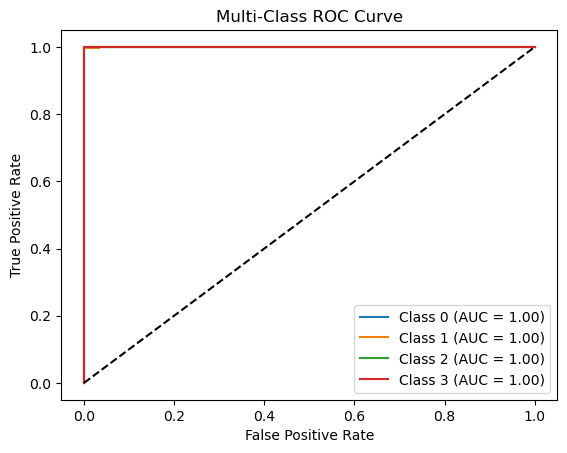

In [209]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming y_true contains class indices (e.g., [0, 1, 2]) and y_pred_prob contains predicted probabilities
classes = [0,1,2,3]
y_true_binarized = label_binarize(y_true, classes=classes)  # One-hot encode y_true for multi-class
n_classes = len(classes)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='best')
plt.show()

In [205]:
# Replace x_train and y_train with validation/test data
y_true = y_train  # Ground truth labels for the test set
#y_pred_prob = model.predict(x_train)  # Predicted probabilities for the test set
print(y_pred_prob)
# Ensure y_true is one-hot encoded for multi-class evaluation
from sklearn.preprocessing import label_binarize
classes = [0,1,2,3]  # Extract unique classes from y_true
print(classes)
y_true_binarized = label_binarize(y_true, classes=classes)


[[9.7265369e-01 2.5962181e-02 8.2373922e-04 5.6043785e-04]
 [9.7432917e-01 2.4403103e-02 7.5624615e-04 5.1147945e-04]
 [9.7591692e-01 2.2912778e-02 6.9785526e-04 4.7256434e-04]
 ...
 [8.1218424e-04 1.1584224e-01 4.1531320e-04 8.8293034e-01]
 [8.2570367e-04 1.1599650e-01 4.1661420e-04 8.8276124e-01]
 [8.2899618e-04 1.1661790e-01 4.1766957e-04 8.8213545e-01]]
[0, 1, 2, 3]


In [145]:
y_true_binarized

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [195]:
import cv2## testing the video clip
from keras.preprocessing.image import img_to_array,load_img
from keras.models import load_model
import numpy as np
video_path = r"C:\Users\kumar\Documents\test3.mp4"
vid = cv2.VideoCapture(video_path)
a=load_model(r"Deep_learning_3cat_adam.h5")
name=["Buglary","Normal","Shoplifiting","Vandalism"]

while(True):
    ret, frame = vid.read()
    frame=cv2.resize(frame,(224,224))
    array=img_to_array(frame)
    print(np.shape(array))
    array=array.reshape(1,224,224,3)
    xdata=np.array(array)
    xdata=xdata.astype("float32")
    xdata=xdata/255.0
    y=model.predict(xdata)

    text=name[np.argmax(y[0])]
    font = cv2.FONT_HERSHEY_SIMPLEX
    org = (50, 50)
    fontScale = 1
    color = (255, 0, 0)
    thickness = 2
    frame = cv2.putText(frame, text, org, font,fontScale, color, thickness, cv2.LINE_AA)
    cv2.imshow('frame', frame)
    print(text)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
vid.release()
cv2.destroyAllWindows()

(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━

In [177]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 96)                  │           6,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 4)                   │             388 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 78,830 (307.93 KB)

 Trainable params: 26,212 (102.39 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 52,426 (204.79 KB)

In [139]:
model.save("CNN_Own_layers.h5")

In [185]:
model.save("CNN_LEakyRelu_Model.h5")

In [207]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred=(model.predict(x_train)> 0.5).astype(int)
# Example
precision = precision_score(y_true, y_pred, average='macro')  # Change 'macro' to 'weighted' or 'micro' as needed
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision (Macro): {precision}")
print(f"Recall (Macro): {recall}")
print(f"F1 Score (Macro): {f1}")

154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step
Precision (Macro): 0.9996113812355711
Recall (Macro): 0.9990656401715552
F1 Score (Macro): 0.9993378778879727
